## 0. Notebook Parameters

---

### 0. 1. Notebook Settings

In [ ]:
"""Google Colab settings"""
"""
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
"""

Mounted at /content/drive


In [1]:
"""Jupyter settings"""
# Enable autoreload
%load_ext autoreload
%autoreload 2

#!pip install ipython-autotime
%load_ext autotime

time: 313 µs (started: 2021-02-25 22:39:50 +01:00)


### 0. 2. Imported Packages

In [2]:
"""Packages for manipulation of vectors, arrays, dataframes"""
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None) # Change display settings of pandas

"""Packages for cleaning dataset"""
import json
import string
import unicodedata

"""Packages for data visualization"""
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn

time: 877 ms (started: 2021-02-25 22:40:02 +01:00)


## 1. Text Pre-processing

---

### 1. 0. Packages Imported

In [13]:
"""Libraries for text preprocessing"""
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer

time: 1.04 ms (started: 2021-02-25 22:49:40 +01:00)


### 1. 1. Import the Data

In [26]:
# Load the sample dataset
file = '../raw_data/ocr_labeled_1k.csv'
off_df_1k_base = pd.read_csv(file)

time: 11.3 ms (started: 2021-02-25 23:00:43 +01:00)


In [27]:
# Deep copy of the dataframe to avoid to reload it
off_1k = off_df_1k_base.copy()

time: 970 µs (started: 2021-02-25 23:01:03 +01:00)


In [31]:
# Load the whole clean dataset
file = '../raw_data/ocr_labeled.csv'
off_df_base = pd.read_csv(file)

time: 6.09 s (started: 2021-02-25 23:03:48 +01:00)


In [32]:
# Deep copy of the dataframe to avoid to reload it
off_df = off_df_base.copy()

time: 27 ms (started: 2021-02-25 23:04:34 +01:00)


In [33]:
# Brief look at the dataset
print(f"""
Shape of the dataset: {off_df.shape}

Columns types of the dataset: 
{off_df.dtypes}
    """)
print("""
Head of the dataset:
    """)
display(off_df.head())


Shape of the dataset: (434896, 6)

Columns types of the dataset: 
barcode           int64
clean_text       object
fr_text          object
source           object
pnns_groups_1    object
pnns_groups_2    object
dtype: object
    

Head of the dataset:
    


,barcode,clean_text,fr_text,source,pnns_groups_1,pnns_groups_2
0,3199660476748,ne eleve abattu en bretagne les eleveurs de bretagne decoupe de podlet noir ferfier labe caracteristiques certifiees fermiereleve en plein air duree delevage jours minimum de cereales alimente avec de vegetaux mineraux et vitamines do mation voir etiquette poidsprix a conserver entre oc et c a consommer cuit a caeurdate limite de co le rheu certifie par certisimmeuble le millepertuis les landes dap produit frais classe a pour toute reclamation sadresser a fermiers dargoat bp ploufragan decoupe et conditionne par ldc bretagne bp quintin homologation n la ce abattoir agree nfr ce fltplt ferlr sat elbretpf origine france yo volaise prixtrg poids net prix a payer kg lot r consommer jusqu au r conserver entre o c et c expedie le loc bretagne lanfains e a au trit aste wwwconsignesdetrfr,"NE\nELEVE\nABATTU\nEN BRETAGNE\nLES ÉLEVEURS\nDE BRETAGNE\nDécoupe de\nPodlet noir\nferfier\nlabe\nCaractéristiques certifiées: Fermier-élevé en plein air. Durée d'élevage 81 jours minimum.\n75% de céréales.\nAlimenté avec 100% de végétaux, minéraux et vitamines do mation : voir étiquette poids/prix\nA conserver entre O°C et +4°C -A consommer cuit à caeur-Date limite de co 35650 Le Rheu\nCertifié par: CERTIS-Immeuble Le Millepertuis- Les Landes d'Ap\nProduit frais\nClasse A\nPour toute réclamation, s'adresser à\nFERMIERS D'ARGOAT: BP77-22440 PLOUFRAGAN\nDécoupé et conditionné par: LDC Bretagne BP 256-2280 QUINTIN\nHomologation\nN° LA/02/75\n099 002\nCE\n2\nAbattoir agréé n'FR 22.099.002 CE\n2FLT.PLT FER.LR SAT\nEL.BRET.PF 2\nORIGINE France\nyo\nVOLAISE\nPrixtrg\nPoids net\nPrix a payer\n0,240kg\nLot\n005809 19 45\nR consommer jusqu au\nR conserver entre O C et +4 C\n10/04/18\nExpedie Le 30/03/18\nLOC BRETAGNE 22 LANFAINS\n22.039.002\ne01\n172225-0/196A\n3 19966014\nAU TRIT ASTE\nwww.CONSIGNESDETRFR\n",/319/966/047/6748/1.json,fish meat eggs,Meat
1,3199660219192,ker chant local decoupes de poulet conditionne par ldc bretagne lanfains rais classe a origine france prodtre et c offre speciale ne eleve prepare local dans notre region cuisdej plt sat kerchant fx origine france volaille francaise prixkg paids net prin apayer kg to a consommer jusqu au r conserver entre d c et c expedie le loc bretagne lanfains autrit pens,"Ker\nchant\n100% LOCAL\nDecoupes de\nPOULET\nConditionné par LDC Bretagne\nLanfains (22) 18\nrais Classe A\nOrigine FRANCE. Prodtre 0 et +4""C\nOFFRE\nSPECIALE\nNE ELEVE PREPARE\n100% LOCAL\nDANS NOTRE REGION\n1CUIS.DEJ. PLT SAT\nKERCHANT FX 1\nORIGINE France\nVOLAILLE\nFRANÇAISE\nPrix/kg\nPaids net\nPrin apayer\n1,000kg\nto\n005806444\nA consommer jusqu au\n27/09/18\nR conserver entre D C et 4 C\nExpedie Le\nLOC BRETAGNE 22 LANFAINS\n2.09.02\n256-106-0/1818\nAUTRIT\nPENS\n3 199660112 19192\n",/319/966/021/9192/1.json,fish meat eggs,Meat
2,3199660219192,cuisdej plt sat kerchant fx origine france volaille francaise prixkg poids net prix a payer kg a consommer jusquau r conserver entre oc et c expedie le loc bretagne lanfains ce e pensez au tri barquette et film plastique ajeter consigne pouvantvarier localement wwwconsignesdetrlfr,"1CUIS.DEJ. PLT SAT\nKERCHANT FX 1\nORIGINE France\nVOLAILLE\nFRANCAISE\nPrix/kg\nPoids net\nPrix a payer\n1,000kg\n0058064444\nA consommer jusqu'au\nR conserver entre OC et 4 C\nExpedie Le\n27/09/18\nLOC BRETAGNE 22 LANFAINS\n22.099.002\nCE\n256 106-0/1818\ne03\n3 199 660112 191921\nPENSEZ\nAU TRI!\nBARQUETTE ET\nFILM PLASTIQUE\nAJETER\nCONSIGNE POUVANTVARIER LOCALEMENT\nwww.CONSIGNESDETRLFR\n",/319/966/021/9192/2.json,fish meat eggs,Meat
3,3199660747848,ker chant logal decoupes de poulet cooduogne pnm lin ne eleve prepare local aiguillette poulet gr dans not origine france prixiky tui et prix a pavar kg region lot consommer jusquau r conserver entre cet c expedie le loc bretrgne lrnfrins a pense au tri,"Ker\nChant\n100% LOGAL\nDécoupes de\nPOULET\nCooduogne pNM LIN\nNE\nELEVE\nPREPARE\n100% LOCAL\nAIGUILLETTE POULET\n500GR\nDANS NOT

time: 21.7 ms (started: 2021-02-25 23:04:49 +01:00)


### 1. 2. Preliminary Text Exploration

#### Get Count per Feature

In [47]:
off = off_df.copy()

# Create count column for each feature
off['barcode_size'] = off['barcode'].apply(lambda x: len(str(x)))
off['word_count'] = off['clean_text'].apply(lambda x: len(str(x).split(" ")))
off['raw_word_count'] = off['fr_text'].apply(lambda x: len(str(x).split(" ")))
off['pnns_1_count'] = off['pnns_groups_1'].apply(lambda x: len(str(x).split(" ")))
off['pnns_2_count'] = off['pnns_groups_2'].apply(lambda x: len(str(x).split(" ")))

off = off[['barcode', 'barcode_size',
              'clean_text', 'word_count',
              'fr_text', 'raw_word_count',
              'pnns_groups_1', 'pnns_1_count',
              'pnns_groups_2', 'pnns_2_count',
              ]].copy()

time: 3.59 s (started: 2021-02-25 23:18:24 +01:00)


In [35]:
off.head()

,barcode,barcode_size,clean_text,word_count,fr_text,raw_word_count,pnns_groups_1,pnns_1_count,pnns_groups_2,pnns_2_count
0,3199660476748,13,ne eleve abattu en bretagne les eleveurs de bretagne decoupe de podlet noir ferfier labe caracteristiques certifiees fermiereleve en plein air duree delevage jours minimum de cereales alimente avec de vegetaux mineraux et vitamines do mation voir etiquette poidsprix a conserver entre oc et c a consommer cuit a caeurdate limite de co le rheu certifie par certisimmeuble le millepertuis les landes dap produit frais classe a pour toute reclamation sadresser a fermiers dargoat bp ploufragan decoupe et conditionne par ldc bretagne bp quintin homologation n la ce abattoir agree nfr ce fltplt ferlr sat elbretpf origine france yo volaise prixtrg poids net prix a payer kg lot r consommer jusqu au r conserver entre o c et c expedie le loc bretagne lanfains e a au trit aste wwwconsignesdetrfr,152,"NE\nELEVE\nABATTU\nEN BRETAGNE\nLES ÉLEVEURS\nDE BRETAGNE\nDécoupe de\nPodlet noir\nferfier\nlabe\nCaractéristiques certifiées: Fermier-élevé en plein air. Durée d'élevage 81 jours minimum.\n75% de céréales.\nAlimenté avec 100% de végétaux, minéraux et vitamines do mation : voir étiquette poids/prix\nA conserver entre O°C et +4°C -A consommer cuit à caeur-Date limite de co 35650 Le Rheu\nCertifié par: CERTIS-Immeuble Le Millepertuis- Les Landes d'Ap\nProduit frais\nClasse A\nPour toute réclamation, s'adresser à\nFERMIERS D'ARGOAT: BP77-22440 PLOUFRAGAN\nDécoupé et conditionné par: LDC Bretagne BP 256-2280 QUINTIN\nHomologation\nN° LA/02/75\n099 002\nCE\n2\nAbattoir agréé n'FR 22.099.002 CE\n2FLT.PLT FER.LR SAT\nEL.BRET.PF 2\nORIGINE France\nyo\nVOLAISE\nPrixtrg\nPoids net\nPrix a payer\n0,240kg\nLot\n005809 19 45\nR consommer jusqu au\nR conserver entre O C et +4 C\n10/04/18\nExpedie Le 30/03/18\nLOC BRETAGNE 22 LANFAINS\n22.039.002\ne01\n172225-0/196A\n3 19966014\nAU TRIT ASTE\nwww.CONSIGNESDETRFR\n",104,fish meat eggs,3,Meat,1
1,3199660219192,13,ker chant local decoupes de poulet conditionne par ldc bretagne lanfains rais classe a origine france prodtre et c offre speciale ne eleve prepare local dans notre region cuisdej plt sat kerchant fx origine france volaille francaise prixkg paids net prin apayer kg to a consommer jusqu au r conserver entre d c et c expedie le loc bretagne lanfains autrit pens,78,"Ker\nchant\n100% LOCAL\nDecoupes de\nPOULET\nConditionné par LDC Bretagne\nLanfains (22) 18\nrais Classe A\nOrigine FRANCE. Prodtre 0 et +4""C\nOFFRE\nSPECIALE\nNE ELEVE PREPARE\n100% LOCAL\nDANS NOTRE REGION\n1CUIS.DEJ. PLT SAT\nKERCHANT FX 1\nORIGINE France\nVOLAILLE\nFRANÇAISE\nPrix/kg\nPaids net\nPrin apayer\n1,000kg\nto\n005806444\nA consommer jusqu au\n27/09/18\nR conserver entre D C et 4 C\nExpedie Le\nLOC BRETAGNE 22 LANFAINS\n2.09.02\n256-106-0/1818\nAUTRIT\nPENS\n3 199660112 19192\n",43,fish meat eggs,3,Meat,1
2,3199660219192,13,cuisdej plt sat kerchant fx origine france volaille francaise prixkg poids net prix a payer kg a consommer jusquau r conserver entre oc et c expedie le loc bretagne lanfains ce e pensez au tri barquette et film plastique ajeter consigne pouvantvarier localement wwwconsignesdetrlfr,57,"1CUIS.DEJ. PLT SAT\nKERCHANT FX 1\nORIGINE France\nVOLAILLE\nFRANCAISE\nPrix/kg\nPoids net\nPrix a payer\n1,000kg\n0058064444\nA consommer jusqu'au\nR conserver entre OC et 4 C\nExpedie Le\n27/09/18\nLOC BRETAGNE 22 LANFAINS\n22.099.002\nCE\n256 106-0/1818\ne03\n3 199 660112 191921\nPENSEZ\nAU TRI!\nBARQUETTE ET\nFILM PLASTIQUE\nAJETER\nCONSIGNE POUVANTVARIER LOCALEMENT\nwww.CONSIGNESDETRLFR\n",30,fish meat eggs,3,Meat,1
3,3199660747848,13,ker chant logal decoupes de poulet cooduogne pnm lin ne eleve prepare local aiguillette poulet gr dans not origine france prixiky tui et prix a pavar kg region lot consommer jusquau r conserver entre cet c expedie le loc bretrgne lrnfrins a pense au tri,58,"Ker\nChant\n100% LOGAL\nDécoupes de\nPOULET\nCooduogne pNM LIN\nNE\nELEVE\nPREPARE\n100% LOCAL\nAIGUI

time: 9.22 ms (started: 2021-02-25 23:05:55 +01:00)


In [36]:
#Descriptive statistics of new categories
off.word_count.describe()

count    434896.000000
mean         67.974355
std          66.696579
min           2.000000
25%          22.000000
50%          46.000000
75%          93.000000
max        1594.000000
Name: word_count, dtype: float64

time: 23.9 ms (started: 2021-02-25 23:06:03 +01:00)


In [37]:
#Descriptive statistics of new categories
off.raw_word_count.describe()

count    434896.000000
mean         47.845381
std          53.517501
min           1.000000
25%          11.000000
50%          30.000000
75%          67.000000
max        1323.000000
Name: raw_word_count, dtype: float64

time: 15.6 ms (started: 2021-02-25 23:06:09 +01:00)


In [38]:
off.pnns_1_count.describe()

count    434896.000000
mean          2.553613
std           0.811003
min           1.000000
25%           2.000000
50%           3.000000
75%           3.000000
max           4.000000
Name: pnns_1_count, dtype: float64

time: 10.7 ms (started: 2021-02-25 23:06:20 +01:00)


In [39]:
off.pnns_2_count.describe()

count    434896.000000
mean          1.938914
std           0.926545
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           6.000000
Name: pnns_2_count, dtype: float64

time: 11 ms (started: 2021-02-25 23:06:25 +01:00)


In [40]:
off.barcode_size.describe()

count    434896.0
mean         13.0
std           0.0
min          13.0
25%          13.0
50%          13.0
75%          13.0
max          13.0
Name: barcode_size, dtype: float64

time: 11.5 ms (started: 2021-02-25 23:06:28 +01:00)


#### Fetch Categories

In [41]:
# Identify pnns_groups_1 Categories
def get_pnns_1_categories():
    """Fetch the categories from the feature pnns_groups_1"""
    #freq = pd.Series(' '.join(off['pnns_groups_1']).split()).value_counts()
    freq = pd.Series(off['pnns_groups_1']).value_counts()
    return freq

time: 606 µs (started: 2021-02-25 23:06:36 +01:00)


In [42]:
# get the pnns_groups_1 categories
cats_group_1 = get_pnns_1_categories()
print(f"Number of categories in Group 1: {len(cats_group_1)}")
print()
cats_group_1

Number of categories in Group 1: 9



sugary snacks              84152
composite foods            61119
fish meat eggs             55872
milk and dairy products    54144
cereals and potatoes       42970
fruits and vegetables      41326
beverages                  35140
salty snacks               32725
fat and sauces             27448
Name: pnns_groups_1, dtype: int64

time: 38.3 ms (started: 2021-02-25 23:06:44 +01:00)


In [43]:
# Identify pnns_groups_2 Categories
def get_pnns_2_categories():
    """Fetch the categories from the feature pnns_groups_2"""
    #freq = pd.Series(' '.join(off['pnns_groups_1']).split()).value_counts()
    freq = pd.Series(off['pnns_groups_2']).value_counts()
    return freq

time: 616 µs (started: 2021-02-25 23:06:48 +01:00)


In [44]:
# get the pnns_groups_2 categories
cats_group_2 = get_pnns_2_categories()
print(f"Number of categories in Group 2: {len(cats_group_2)}")
print()
cats_group_2

Number of categories in Group 2: 43



One-dish meals                      51447
Biscuits and cakes                  38357
Sweets                              31716
Processed meat                      23363
Cheese                              19721
Milk and yogurt                     18651
Fish and seafood                    18555
Cereals                             17848
Dressings and sauces                17330
Salty and fatty products            16158
Vegetables                          15531
Sweetened beverages                 12849
Fruits                              12686
Appetizers                          11839
Bread                               10803
Fats                                10118
Fruit juices                         9843
Dairy desserts                       9722
Meat                                 9508
Chocolate products                   8753
Breakfast cereals                    7329
Ice cream                            6050
pastries                             5326
Pizza pies and quiche             

time: 38.7 ms (started: 2021-02-25 23:06:54 +01:00)


#### Frequency of Words

In [45]:
# Count unique words
def count_words():
    """Count the number of unique words from clean_text"""
    freq = len(pd.Series(' '.join(off['clean_text']).split()).value_counts())
    return freq

# Apply the function
count_words = count_words()
print(f"number of unique words in text: {count_words}")

number of unique words in text: 849451
time: 5min 36s (started: 2021-02-25 23:09:41 +01:00)


In [48]:
# Identify common words
def get_n_most_common_words(n=20):
    """Fetch n most common words from clean_text"""
    freq = pd.Series(' '.join(off['clean_text']).split()).value_counts()[:n]
    return freq

time: 673 µs (started: 2021-02-25 23:18:44 +01:00)


In [49]:
# get the 50 most common words
common_words_50 = get_n_most_common_words(50)common_words_5050

de                 1742524
g                  1217607
a                   532320
et                  387466
pour                274170
dont                272293
sel                 262599
en                  239155
la                  220754
kcal                194295
au                  183429
le                  176252
ingredients         166864
kj                  165628
gras                153329
lait                152570
e                   142167
sucres              137039
proteines           134976
des                 132492
sucre               131075
france              124275
consommer           118950
grasses             117764
matieres            116838
valeurs             114832
satures             113950
glucides            113774
acides              110542
les                 108766
nutritionnelles     108225
eau                 107662
energie             107473
c                   106936
ble                 103365
un                  102381
moyennes             96608
d

time: 28.8 s (started: 2021-02-25 23:18:50 +01:00)


In [54]:
common_words_50[:6]

de      1742524
g       1217607
a        532320
et       387466
pour     274170
dont     272293
dtype: int64

time: 2.75 ms (started: 2021-02-25 23:21:00 +01:00)


In [50]:
# Identify uncommon words
def get_n_most_uncommon_words(n=20):
    """Fetch n most uncommon words from clean_text"""
    freq = pd.Series(' '.join(off['clean_text']).split()).value_counts()[-n:]
    return freq

time: 595 µs (started: 2021-02-25 23:19:19 +01:00)


In [51]:
# get the 20 most uncommon words
uncommon_words_20 = get_n_most_uncommon_words()
uncommon_words_20

dhlorurede         1
climprivilegie     1
foulouse           1
lailj              1
eadmme             1
presseeset         1
gclecaes           1
vinaigresjaune     1
faiere             1
congrescapelans    1
wwwcneaine         1
bosilk             1
gretzarmainy       1
antioxidations     1
vanta              1
thymx              1
refermaerature     1
tonales            1
biciogae           1
wmn                1
dtype: int64

time: 20.6 s (started: 2021-02-25 23:19:19 +01:00)


### 1. 3. Normalization of Words

In [52]:
# Stemming to normalize text by removing suffixes
stem = PorterStemmer() 
# Lemmatisation to normalize text by extracting root of the word
lem = WordNetLemmatizer() 

time: 1.22 ms (started: 2021-02-25 23:19:43 +01:00)


In [ ]:
# Example of the effects of Stemming and Lemmatization
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

stemming: invers
lemmatization: inversely


### 1. 4. Noise Removal in Text

In [58]:
"""Remove stopwords"""

# Create a list of base stopwords
stop_words = set(stopwords.words('english') + stopwords.words('french'))

# Create a list of custom stopwords
custom_stopwords = get_n_most_common_words(6).index.tolist()

# Add custom stopwords to the main list
stop_words = stop_words.union(custom_stopwords)

time: 5min 1s (started: 2021-02-25 23:25:58 +01:00)


### 1. 5. Step by Step Workflow for Text Pre-processing

In [ ]:
off_df.dtypes

barcode           int64
clean_text       object
fr_text          object
source           object
pnns_groups_1    object
pnns_groups_2    object
dtype: object

In [ ]:
corpus = []
for i in range(0, len(off_df)):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', off_df['clean_text'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()

    text = [
            lem.lemmatize(word) for word in text 
            if not word in stop_words
            ] 
    text = " ".join(text)
    corpus.append(text)

In [ ]:
len(corpus)

1000

In [ ]:
#View corpus item
corpus[1]

'ker chant local decoupes poulet conditionne ldc bretagne lanfains rais classe origine france prodtre offre speciale eleve prepare local region cuisdej plt sat kerchant fx origine france volaille francaise prixkg paids net prin apayer kg consommer jusqu r conserver entre expedie loc bretagne lanfains autrit pen'

In [ ]:
#View corpus item
corpus[1]

'ker chant local decoupes poulet conditionne ldc bretagne lanfains rais classe origine france prodtre offre speciale eleve prepare local region cuisdej plt sat kerchant fx origine france volaille francaise prixkg paids net prin apayer kg consommer jusqu r conserver entre expedie loc bretagne lanfains autrit pen'

In [ ]:
#@title ####Clean OCR Text { display-mode: "form" }
"""Format the content of the column TEXT"""

def lower_case(text):
    """Lower case"""
    text = text.lower()
    return text

def replace_slashn(text):
    """Replace '/n' """
    text = text.replace('\n',' ')
    return text

def remove_punc(text):
    """Remove punctuation"""
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

def remove_digit(text):
    """Remove digits"""
    return ''.join(word for word in text if not word.isdigit())

def remove_nonalpha(text):
    """Remove nonalpha characters"""
    return ''.join(word for word in text if word.isalpha() or word == ' ')

def remove_accents(text):
    """Remove accents"""
    return ''.join(
        c for c in unicodedata.normalize('NFKD', text) 
        if unicodedata.category(c) != 'Mn'
        )

def remove_specialchar(text):
    """Remove special characters"""
    return ''.join(word for word in text if word.isalpha() or word == ' ')

def text_formatting_workflow():
    """Workflow of text formatting"""
    ocr_df['clean_text'] = ocr_df.fr_text.apply(lambda text: lower_case(text))
    ocr_df['clean_text'] = ocr_df.clean_text.apply(lambda text: replace_slashn(text))
    ocr_df['clean_text'] = ocr_df.clean_text.apply(lambda text: remove_punc(text))
    ocr_df['clean_text'] = ocr_df.clean_text.apply(lambda text: remove_digit(text))
    # ocr_df['clean_text'] = ocr_df.clean_text.apply(lambda text: remove_nonalpha(text))
    ocr_df['clean_text'] = ocr_df.clean_text.apply(lambda text: remove_accents(text))
    ocr_df['clean_text'] = ocr_df.clean_text.apply(lambda text: remove_specialchar(text))
    
    return ocr_df


# Apply workflow of text formatting
# text_formatting_workflow()

## 2. EDA - Exploratory Data Analysis

### 2. 1. Word Cloud

In [ ]:
# Packages for Word Cloud

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

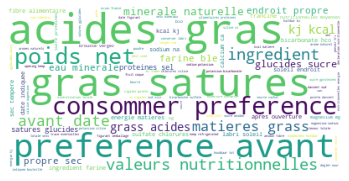

In [ ]:
# Display Word Cloud
wordcloud = WordCloud(background_color='white',
                      stopwords=stop_words,
                      max_words=100,
                      max_font_size=50, 
                      random_state=42,
                      ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

### 2. 2. Creating a vector of word counts

#### Text preparation for a bag of words model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import re

# Instanciate model
cv = CountVectorizer(max_df=0.8,
                     stop_words=stop_words,
                     max_features=10000,
                     ngram_range=(1,3),
                     )

# Train model to build a vocabulary
X = cv.fit_transform(corpus)

In [ ]:
cv.__dict__

{'_stop_words_id': 139928768003680,
 'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'fixed_vocabulary_': False,
 'input': 'content',
 'lowercase': True,
 'max_df': 0.8,
 'max_features': 10000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': {'a',
  'about',
  'above',
  'after',
  'again',
  'against',
  'ai',
  'aie',
  'aient',
  'aies',
  'ain',
  'ait',
  'all',
  'am',
  'an',
  'and',
  'any',
  'are',
  'aren',
  "aren't",
  'as',
  'at',
  'au',
  'aura',
  'aurai',
  'auraient',
  'aurais',
  'aurait',
  'auras',
  'aurez',
  'auriez',
  'aurions',
  'aurons',
  'auront',
  'aux',
  'avaient',
  'avais',
  'avait',
  'avec',
  'avez',
  'aviez',
  'avions',
  'avons',
  'ayant',
  'ayante',
  'ayantes',
  'ayants',
  'ayez',
  'ayons',
  'be',
  'because',
  'been',
  'before',
  'being',
  'below',
  'between',
  'both',
  'but',
  'by',
  'c',
  'can',
  'ce',
  'ces',
  'couldn',
  "

In [ ]:
list(cv.vocabulary_.keys())[:20]

['eleve',
 'bretagne',
 'decoupe',
 'podlet',
 'noir',
 'caracteristiques',
 'certifiees',
 'plein',
 'air',
 'jours',
 'minimum',
 'cereales',
 'mineraux',
 'vitamines',
 'voir',
 'etiquette',
 'conserver',
 'entre',
 'oc',
 'consommer']

In [ ]:
list(cv.vocabulary_.keys())[-20:]

['petillante salretat eau',
 'groupe danone',
 'marque groupe danone',
 'cpcd',
 'pauvre sodi',
 'pauvre sodi etat',
 'petillante salvetat uminer',
 'pau',
 'pau ml',
 'pau ml calcium',
 'pensez tri tri',
 'pauvre sodum',
 'pauvre sodum vetat',
 'pau mineralisation',
 'pau mineralisation aracteristique',
 'petil',
 'petil veta',
 'petil veta eine',
 'pauvre sodium lo',
 'petillante salveta cau']

### 2. 3. Visualize top N uni-grams, bi-grams & tri-grams

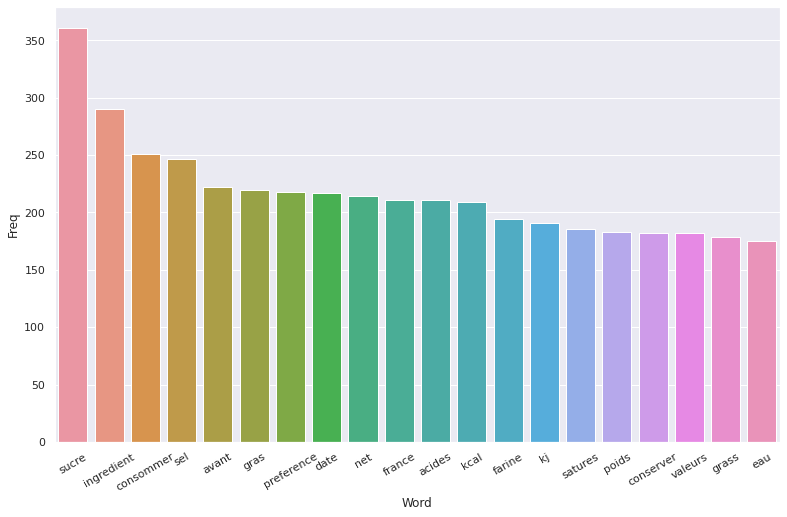

In [ ]:
"""Use the CountVectoriser to visualise the top n unigrams, bi-grams and tri-grams"""

import seaborn as sns

#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [
                  (word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()
                  ]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

#Barplot of most freq words
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30);

                    Bi-gram  Freq
0               acides gras   197
1          preference avant   179
2              gras satures   170
3      consommer preference   165
4                 poids net   153
5   valeurs nutritionnelles   138
6                avant date   122
7            matieres grass   112
8              grass acides   111
9                   kj kcal   108
10       minerale naturelle    99
11           glucides sucre    89
12             eau minerale    77
13            proteines sel    76
14               farine ble    75
15           endroit propre    73
16               propre sec    72
17         satures glucides    69
18          apres ouverture    66
19        sulfate chlorures    60


[Text(0, 0, 'acides gras'),
 Text(0, 0, 'preference avant'),
 Text(0, 0, 'gras satures'),
 Text(0, 0, 'consommer preference'),
 Text(0, 0, 'poids net'),
 Text(0, 0, 'valeurs nutritionnelles'),
 Text(0, 0, 'avant date'),
 Text(0, 0, 'matieres grass'),
 Text(0, 0, 'grass acides'),
 Text(0, 0, 'kj kcal'),
 Text(0, 0, 'minerale naturelle'),
 Text(0, 0, 'glucides sucre'),
 Text(0, 0, 'eau minerale'),
 Text(0, 0, 'proteines sel'),
 Text(0, 0, 'farine ble'),
 Text(0, 0, 'endroit propre'),
 Text(0, 0, 'propre sec'),
 Text(0, 0, 'satures glucides'),
 Text(0, 0, 'apres ouverture'),
 Text(0, 0, 'sulfate chlorures')]

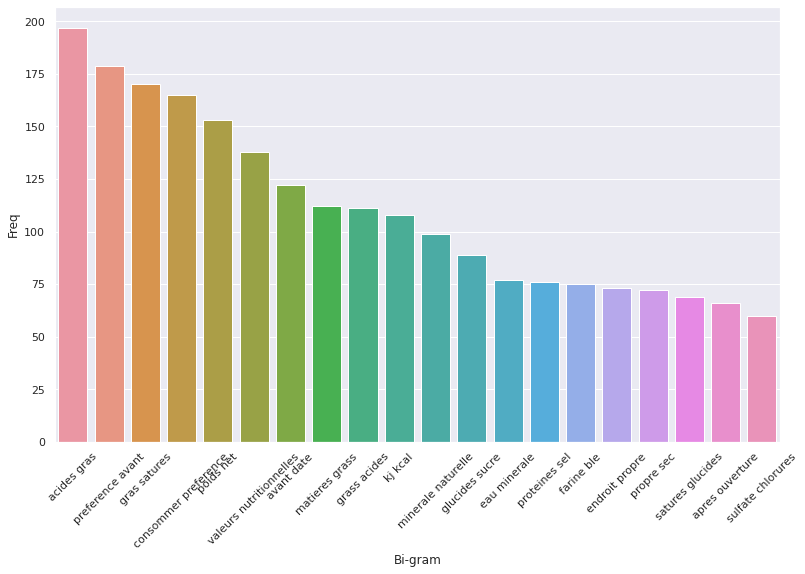

In [ ]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                            Tri-gram  Freq
0                acides gras satures   155
1         consommer preference avant   152
2                  grass acides gras   106
3              preference avant date   104
4             eau minerale naturelle    69
5              gras satures glucides    68
6                 endroit propre sec    66
7              matieres grass acides    65
8             satures glucides sucre    59
9                 propre sec tempere    58
10             soleil endroit propre    56
11            energie matieres grass    48
12               avant date indiquee    47
13              labri soleil endroit    46
14             ingredient farine ble    44
15      fibre alimentaires proteines    40
16  valeurs nutritionnelles moyennes    38
17                pointe daccent sud    38
18            cigales pointe daccent    37
19                  daccent sud zzzz    37
20                   sud zzzz sieste    37
21        alimentaires proteines sel    36
22         

[Text(0, 0, 'acides gras satures'),
 Text(0, 0, 'consommer preference avant'),
 Text(0, 0, 'grass acides gras'),
 Text(0, 0, 'preference avant date'),
 Text(0, 0, 'eau minerale naturelle'),
 Text(0, 0, 'gras satures glucides'),
 Text(0, 0, 'endroit propre sec'),
 Text(0, 0, 'matieres grass acides'),
 Text(0, 0, 'satures glucides sucre'),
 Text(0, 0, 'propre sec tempere'),
 Text(0, 0, 'soleil endroit propre'),
 Text(0, 0, 'energie matieres grass'),
 Text(0, 0, 'avant date indiquee'),
 Text(0, 0, 'labri soleil endroit'),
 Text(0, 0, 'ingredient farine ble'),
 Text(0, 0, 'fibre alimentaires proteines'),
 Text(0, 0, 'valeurs nutritionnelles moyennes'),
 Text(0, 0, 'pointe daccent sud'),
 Text(0, 0, 'cigales pointe daccent'),
 Text(0, 0, 'daccent sud zzzz'),
 Text(0, 0, 'sud zzzz sieste'),
 Text(0, 0, 'alimentaires proteines sel'),
 Text(0, 0, 'cs cigales pointe'),
 Text(0, 0, 'glucides sucre amidon'),
 Text(0, 0, 'totale sels mineraux'),
 Text(0, 0, 'date indiquee bouteille'),
 Text(0, 0, 

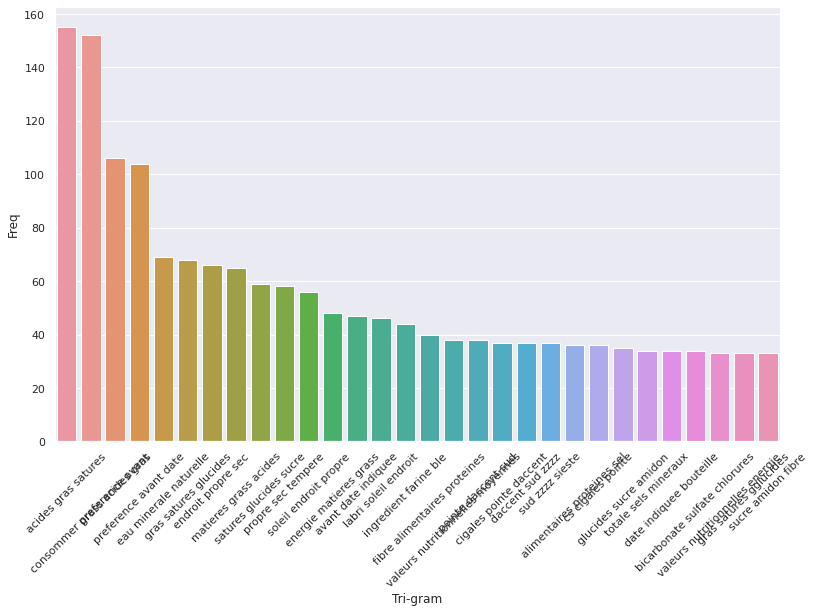

In [ ]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=30)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)

#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [ ]:
top3_df

,Tri-gram,Freq
0,acides gras satures,155
1,consommer preference avant,152
2,grass acides gras,106
3,preference avant date,104
4,eau minerale naturelle,69
5,gras satures glucides,68
6,endroit propre sec,66
7,matieres grass acides,65
8,satures glucides sucre,59
9,propre sec tempere,58


time: 14.3 ms (started: 2021-02-25 15:05:20 +00:00)


In [ ]:
top3_list = top3_df['Tri-gram'].tolist()
top3_list

['acides gras satures',
 'consommer preference avant',
 'grass acides gras',
 'preference avant date',
 'eau minerale naturelle',
 'gras satures glucides',
 'endroit propre sec',
 'matieres grass acides',
 'satures glucides sucre',
 'propre sec tempere',
 'soleil endroit propre',
 'energie matieres grass',
 'avant date indiquee',
 'labri soleil endroit',
 'ingredient farine ble',
 'fibre alimentaires proteines',
 'valeurs nutritionnelles moyennes',
 'pointe daccent sud',
 'cigales pointe daccent',
 'daccent sud zzzz',
 'sud zzzz sieste',
 'alimentaires proteines sel',
 'cs cigales pointe',
 'glucides sucre amidon',
 'totale sels mineraux',
 'date indiquee bouteille',
 'bicarbonate sulfate chlorures',
 'valeurs nutritionnelles energie',
 'gras satures gglucides',
 'sucre amidon fibre']

time: 3.99 ms (started: 2021-02-25 15:08:14 +00:00)


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[532]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [ ]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
int int beacin dune recette simnple gourmande cudune idee menu rendezvous wwwgrancinecom fnaredients nutrition lange dquilibre preparation painaux cereales stsfarine ble graines tournescl farine seige delin brungluten ble levain ble deshydrate uigifiantee etrose mailt dorge agent tament farinee enzyme pretsemce ventuelle desoja lait deuf graines desesame ceneales fruit coque farine pain cuit ion omnele kcal k kcal k eres grses opides gras re guoides sucre dnaidon fbres mentaires qg proeines erver bfabride lo chaleur humiditee ommer preference avant date inscrite dessus soche tjet b dessicoation pouvant entrainer variation poids kg poids net lemballage grand moulins paris sne eurs francine

Keywords:
int 0.242
ble 0.177
graines 0.165
seige 0.126
proeines 0.126
